<a href="https://colab.research.google.com/github/shuchimishra/Tensorflow_projects/blob/main/Tensorflow_Code/CNN/exam/Category3_German_traffic_signs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Found 31367 files belonging to 43 classes.
Found 7842 files belonging to 43 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 128)       3584      
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 128)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 128)         0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         147584    
                                     

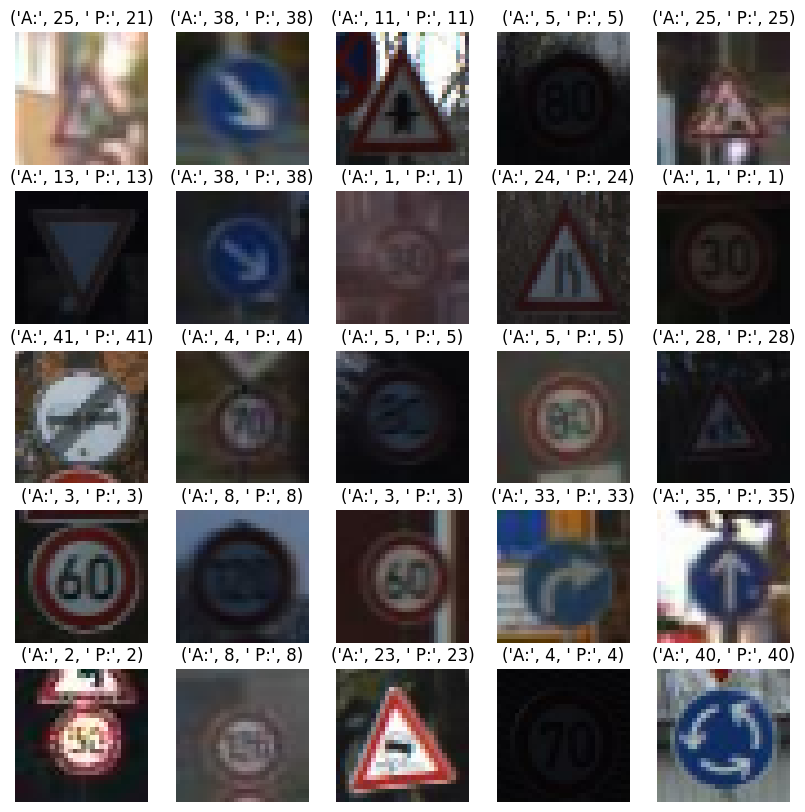

In [48]:
# ======================================================================
# There are 5 questions in this exam with increasing difficulty from 1-5.
# Please note that the weight of the grade for the question is relative
# to its difficulty. So your Category 1 question will score significantly
# less than your Category 5 question.
#
# Don't use lambda layers in your model.
# You do not need them to solve the question.
# Lambda layers are not supported by the grading infrastructure.
#
# You must use the Submit and Test button to submit your model
# at least once in this category before you finally submit your exam,
# otherwise you will score zero for this category.
# ==============================================================================
#
# BASIC DATASETS QUESTION
#
# Create a classifier for the German Traffic Signs dataset that classifies
# images of traffic signs into 43 classes.
# ==============================================================================
#
# ABOUT THE DATASET
#
# The dataset contains traffic sign boards from the streets captured into
# image files. There are 43 unique classes in total. The images are of shape
# (30,30,3).
# ==============================================================================
#
# INSTRUCTIONS
#
# We have already divided the data for training and validation.
#
# Complete the code in following functions:
# 1. preprocess()
# 2. solution_model()
#
# Your code will fail to be graded if the following criteria are not met:
# 1. The input shape of your model must be (30,30,3), because the testing
#    infrastructure expects inputs according to this specification.
# 2. The last layer of your model must be a Dense layer with 43 neurons
#    activated by softmax since this dataset has 43 classes.
#
# HINT: Your neural network must have a validation accuracy of approximately
# 0.95 or above on the normalized validation dataset for top marks.

import urllib
import zipfile
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import os
import numpy as np
import sys
from keras.optimizers import RMSprop

import warnings
warnings.filterwarnings('ignore')

def predict_and_visualize():
  plt.figure(figsize=(10, 10))
  for images, labels in val_ds.take(1):
    for i in range(25):
      ax = plt.subplot(5, 5, i + 1)
      plt.imshow(images[i]) #.numpy().astype("uint8")
      #True label
      label = np.argmax(labels[i], axis=0) #convert one hot encoded label to int value
      #Predicted label
      img_array = tf.expand_dims(images[i], 0)
      predictions = model.predict(img_array)
      score = np.argmax(predictions)
      title = ("A:",label," P:",score)
      plt.title(title)
      plt.axis("off")

# This function downloads and extracts the dataset to the directory that
# contains this file.
# DO NOT CHANGE THIS CODE
# (unless you need to change https to http)
def download_and_extract_data():
    url = 'https://storage.googleapis.com/download.tensorflow.org/data/certificate/germantrafficsigns.zip'
    urllib.request.urlretrieve(url, 'germantrafficsigns.zip')
    with zipfile.ZipFile('germantrafficsigns.zip', 'r') as zip_ref:
        zip_ref.extractall()

# COMPLETE THE CODE IN THIS FUNCTION
def preprocess(image, label):
    # NORMALIZE YOUR IMAGES HERE (HINT: Rescale by 1/.255)print(type(label))
    image  = image * 1./255
    return image, label

# This function loads the data, normalizes and resizes the images, splits it into
# train and validation sets, defines the model, compiles it and finally
# trains the model. The trained model is returned from this function.

# COMPLETE THE CODE IN THIS FUNCTION.
def solution_model():
    # Downloads and extracts the dataset to the directory that
    # contains this file.
    download_and_extract_data()

    BATCH_SIZE = 32
    IMG_SIZE = 30

    # The following code reads the training and validation data from their
    # respective directories, resizes them into the specified image size
    # and splits them into batches. You must fill in the image_size
    # argument for both training and validation data.
    # HINT: Image size is a tuple
    train_ds = tf.keras.preprocessing.image_dataset_from_directory(
        directory='train/',
        label_mode='categorical',
        image_size=  (IMG_SIZE,IMG_SIZE) # YOUR CODE HERE
        , batch_size = BATCH_SIZE)

    val_ds = tf.keras.preprocessing.image_dataset_from_directory(
        directory='validation/',
        label_mode='categorical',
        image_size=  (IMG_SIZE,IMG_SIZE) # YOUR CODE HERE
        , batch_size = BATCH_SIZE)

    # Normalizes train and validation datasets using the
    # preprocess() function.
    # Also makes other calls, as evident from the code, to prepare them for
    # training.
    # Do not batch or resize the images in the dataset here since it's already
    # been done previously.

    train_ds = train_ds.map(preprocess, num_parallel_calls=tf.data.experimental.AUTOTUNE).prefetch(tf.data.experimental.AUTOTUNE)
    val_ds = val_ds.map(preprocess, num_parallel_calls=tf.data.experimental.AUTOTUNE)

    #check the classes
    [(train_features, label_batch)] = train_ds.take(1)
    label_batch = np.array(label_batch)
    # np.set_printoptions(threshold=sys.maxsize)
    # print(label_batch.shape)

    #Retrieve number of classes
    num_classes = label_batch.shape[1]

    # Code to define the model
    model = tf.keras.models.Sequential([
        # ADD LAYERS OF THE MODEL HERE
        tf.keras.layers.Input(shape=(30, 30, 3)),
        layers.Conv2D(128, (3,3), activation='relu'),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(128, (3,3), activation='relu'),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(128, (3,3), activation='relu'),
        layers.MaxPooling2D((2,2)),
        layers.GlobalMaxPool2D(),
        layers.Dense(512, activation='relu'),
        # If you don't adhere to the instructions in the following comments,
        # tests will fail to grade your model:
        # The input layer of your model must have an input shape of
        # (30,30,3).
        # Make sure your last layer has 43 neurons activated by softmax.
        tf.keras.layers.Dense(num_classes, activation=tf.nn.softmax)
    ])

    model.summary()

    #callbacks
    MCP = keras.callbacks.ModelCheckpoint(filepath='bestmodel.h5',monitor='val_accuracy', mode='auto',save_best_only=True,save_weights_only=False,verbose=1)
    RLP = keras.callbacks.ReduceLROnPlateau(monitor="val_accuracy",factor=0.1,patience=3, verbose=1,mode="auto",min_lr=0.000000001)
    ES = keras.callbacks.EarlyStopping(monitor='val_accuracy',min_delta=1e-4,patience=8,verbose=1,start_from_epoch=10)


    # Code to compile and train the model
    model.compile(optimizer=RMSprop(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

    tf.keras.backend.clear_session()
    history = model.fit(train_ds, validation_data=val_ds,epochs=10, verbose=2, callbacks=[MCP,RLP,ES])

    model.evaluate(val_ds)

    #predict and visualize validation labels; uncomment if needed
    # predict_and_visualize()

    return model


# Note that you'll need to save your model as a .h5 like this.
# When you press the Submit and Test button, your saved .h5 model will
# be sent to the testing infrastructure for scoring
# and the score will be returned to you.
if __name__ == '__main__':
    model = solution_model()
    model.save("mymodel.h5")


In [1]:
# import urllib
# import zipfile
# import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras import layers
# import os
# import numpy as np
# import sys

# import warnings
# warnings.filterwarnings('ignore')
# from keras.optimizers import RMSprop

In [2]:
# url = 'https://storage.googleapis.com/download.tensorflow.org/data/certificate/germantrafficsigns.zip'
# urllib.request.urlretrieve(url, 'germantrafficsigns.zip')
# with zipfile.ZipFile('germantrafficsigns.zip', 'r') as zip_ref:
#   zip_ref.extractall()

In [3]:
# BATCH_SIZE = 32
# IMG_SIZE = 30

In [4]:
# def preprocess(image, label):
#     # NORMALIZE YOUR IMAGES HERE (HINT: Rescale by 1/.255)print(type(label))
#     image  = image * 1./255
#     return image, label

In [5]:
# '''
# If label_mode is None, it yields float32 tensors of shape (batch_size, image_size[0], image_size[1], num_channels), encoding images (see below for rules regarding num_channels).
# Otherwise, it yields a tuple (images, labels), where images has shape (batch_size, image_size[0], image_size[1], num_channels), and labels follows the format described below.
# Rules regarding labels format:

# if label_mode is "int", the labels are an int32 tensor of shape (batch_size,).
# if label_mode is "binary", the labels are a float32 tensor of 1s and 0s of shape (batch_size, 1).
# if label_mode is "categorical", the labels are a float32 tensor of shape (batch_size, num_classes), representing a one-hot encoding of the class index.
# '''

# train_ds = tf.keras.preprocessing.image_dataset_from_directory(directory='train/', label_mode='categorical', #labels are encoded as a categorical vector (e.g. for categorical_crossentropy loss)
#                                                                image_size=(IMG_SIZE,IMG_SIZE), batch_size = BATCH_SIZE)

# val_ds = tf.keras.preprocessing.image_dataset_from_directory(directory='validation/', label_mode='categorical', image_size=(IMG_SIZE,IMG_SIZE), batch_size = BATCH_SIZE)


Found 31367 files belonging to 43 classes.
Found 7842 files belonging to 43 classes.


In [7]:
# train_ds = train_ds.map(preprocess, num_parallel_calls=tf.data.experimental.AUTOTUNE).prefetch(tf.data.experimental.AUTOTUNE)
# val_ds = val_ds.map(preprocess, num_parallel_calls=tf.data.experimental.AUTOTUNE)

In [9]:
# #check the classes
# [(train_features, label_batch)] = train_ds.take(1)
# label_batch = np.array(label_batch)

# # np.set_printoptions(threshold=sys.maxsize)
# # print(label_batch.shape)

(32, 43)


In [21]:
# #Retrieve number of classes
# num_classes = label_batch.shape[1]

In [23]:
# inputs = tf.keras.Input(shape=(30, 30, 3))
# x = layers.Conv2D(128, (3,3), activation='relu')(inputs)
# x = layers.MaxPooling2D((2,2))(x)
# x = layers.Conv2D(128, (3,3), activation='relu')(x)
# x = layers.MaxPooling2D((2,2))(x)
# x = layers.Conv2D(128, (3,3), activation='relu')(x)
# x = layers.MaxPooling2D((2,2))(x)
# x = tf.keras.layers.GlobalMaxPool2D()(x)
# x = layers.Dense(512, activation='relu')(x)
# outputs = layers.Dense(num_classes, activation='softmax')(x)

# model = tf.keras.Model(inputs, outputs)

# # model = keras.models.Sequential([
# #   data_augmentation_layer(input_shape=(30, 30, 3)),
# #   layers.Rescaling(1./255),
# #   layers.Conv2D(64, (3,3), activation='relu'),
# #   layers.MaxPooling2D((2,2)),
# #   layers.Conv2D(128, (3,3), activation='relu'),
# #   layers.MaxPooling2D((2,2)),
# #   layers.Conv2D(128, (3,3), activation='relu'),
# #   layers.MaxPooling2D((2,2)),
# #   # layers.Flatten(),
# #   tf.keras.layers.GlobalMaxPool2D(),
# #   layers.Dropout(0.2),
# #   layers.Dense(512, activation='relu'),
# #   layers.Dense(43, activation='softmax')
# # ])

# model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 30, 30, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 128)       3584      
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 128)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 128)         0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         147584

In [24]:
# #callbacks
# MCP = keras.callbacks.ModelCheckpoint(filepath='bestmodel.h5',monitor='val_accuracy', mode='auto',save_best_only=True,save_weights_only=False,verbose=1)
# RLP = keras.callbacks.ReduceLROnPlateau(monitor="val_accuracy",factor=0.1,patience=3, verbose=1,mode="auto",min_lr=0.000000001)
# ES = keras.callbacks.EarlyStopping(monitor='val_accuracy',min_delta=1e-4,patience=8,verbose=1,start_from_epoch=10)


In [25]:
# model.compile(optimizer=RMSprop(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [26]:
# tf.keras.backend.clear_session()

# epochs=10
# history = model.fit(train_ds, validation_data=val_ds,epochs=epochs, verbose = 2, callbacks=[MCP,RLP,ES])

# model.evaluate(val_ds)

Epoch 1/10

Epoch 1: val_accuracy improved from -inf to 0.84251, saving model to bestmodel.h5
981/981 - 10s - loss: 1.5871 - accuracy: 0.5477 - val_loss: 0.5546 - val_accuracy: 0.8425 - lr: 0.0010 - 10s/epoch - 10ms/step
Epoch 2/10

Epoch 2: val_accuracy improved from 0.84251 to 0.96174, saving model to bestmodel.h5
981/981 - 5s - loss: 0.1903 - accuracy: 0.9451 - val_loss: 0.1288 - val_accuracy: 0.9617 - lr: 0.0010 - 5s/epoch - 6ms/step
Epoch 3/10

Epoch 3: val_accuracy did not improve from 0.96174
981/981 - 6s - loss: 0.0920 - accuracy: 0.9735 - val_loss: 0.7021 - val_accuracy: 0.8628 - lr: 0.0010 - 6s/epoch - 6ms/step
Epoch 4/10

Epoch 4: val_accuracy improved from 0.96174 to 0.98865, saving model to bestmodel.h5
981/981 - 5s - loss: 0.0606 - accuracy: 0.9827 - val_loss: 0.0505 - val_accuracy: 0.9887 - lr: 0.0010 - 5s/epoch - 6ms/step
Epoch 5/10

Epoch 5: val_accuracy did not improve from 0.98865
981/981 - 5s - loss: 0.0451 - accuracy: 0.9868 - val_loss: 0.0610 - val_accuracy: 0.987

[0.03387720137834549, 0.9941341280937195]

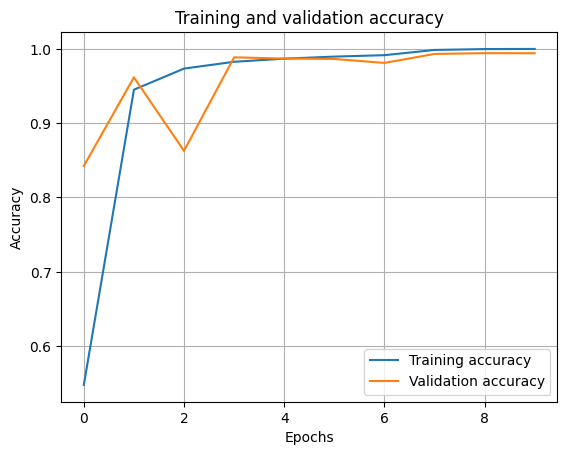

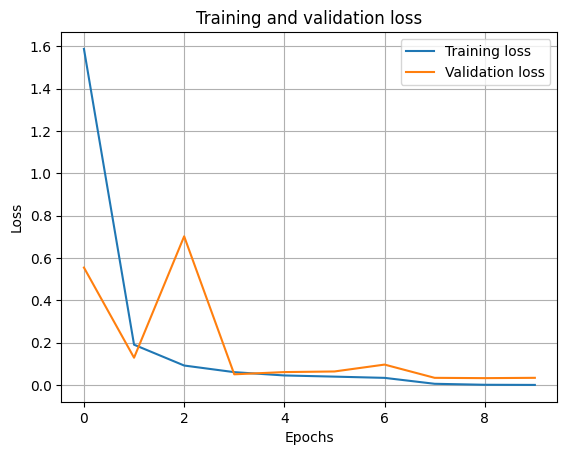

In [27]:
# import matplotlib.pyplot as plt
# %matplotlib inline
# %config InlineBackend.fugure_format = 'retina'
# def plot_loss_acc(history):
#   #-----------------------------------------------------------
#   # Retrieve a list of list results on training and test data
#   # sets for each training epoch
#   #-----------------------------------------------------------
#   acc      = history.history[     'accuracy' ]
#   val_acc  = history.history[ 'val_accuracy' ]
#   loss     = history.history[    'loss' ]
#   val_loss = history.history['val_loss' ]
#   epochs   = range(len(acc)) # Get number of epochs
#   #------------------------------------------------
#   # Plot training and validation accuracy per epoch
#   #------------------------------------------------
#   plt.plot  ( epochs,     acc, label='Training accuracy' )
#   plt.plot  ( epochs, val_acc, label='Validation accuracy' )
#   plt.title ('Training and validation accuracy')
#   plt.grid()
#   plt.legend()
#   plt.xlabel("Epochs")
#   plt.ylabel("Accuracy")
#   plt.figure()
#   #------------------------------------------------
#   # Plot training and validation loss per epoch
#   #------------------------------------------------
#   plt.plot  ( epochs,     loss, label='Training loss' )
#   plt.plot  ( epochs, val_loss, label='Validation loss' )
#   plt.grid()
#   plt.legend()
#   plt.xlabel("Epochs")
#   plt.ylabel("Loss")
#   plt.title ('Training and validation loss'   )

# # Plot training results
# plot_loss_acc(history)

1/1 [==============================] - 0s 19ms/step


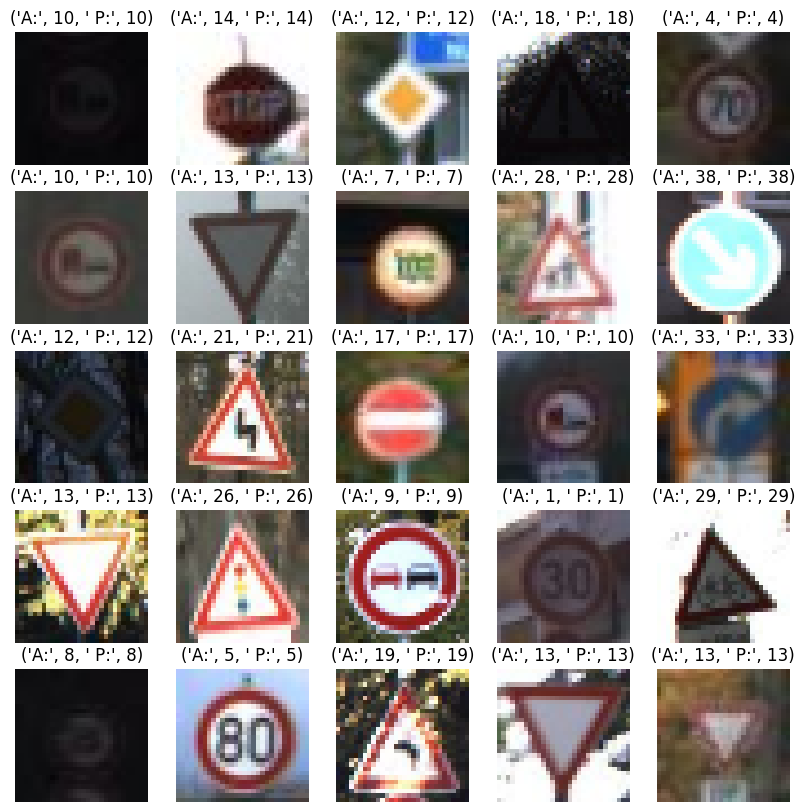

In [47]:
# plt.figure(figsize=(10, 10))
# for images, labels in val_ds.take(1):
#   for i in range(25):
#     ax = plt.subplot(5, 5, i + 1)
#     plt.imshow(images[i]) #.numpy().astype("uint8")
#     #True label
#     label = np.argmax(labels[i], axis=0) #convert one hot encoded label to int value
#     #Predicted label
#     img_array = tf.expand_dims(images[i], 0)
#     predictions = model.predict(img_array)
#     score = np.argmax(predictions)
#     title = ("A:",label," P:",score)
#     plt.title(title)
#     plt.axis("off")


# Extra - not part of code

In [22]:

# # data_augmentation = keras.Sequential(
# #     [
# #         layers.RandomFlip("horizontal"),
# #         layers.RandomRotation(0.2),
# #         layers.RandomZoom(0.2),
# #         layers.RandomContrast(0.2),
# #         layers.RandomHeight(0.2),
# #         layers.RandomWidth(0.2),
# #     ]
# # )

# # rotation_range=40,
# #     width_shift_range=0.2,
# #     height_shift_range=0.2,
# #     shear_range=0.2,
# #     zoom_range=0.2,
# #     fill_mode='nearest',
# #     horizontal_flip=True,
# #     rescale=1./255.

# data_augmentation_layer = tf.keras.Sequential([
#   tf.keras.layers.RandomFlip('horizontal',input_shape=(30, 30, 3)),
#   # tf.keras.layers.RandomRotation(0.2),
#   tf.keras.layers.RandomZoom(0.05)
#   # tf.keras.layers.RandomWidth(0.1),
#   # tf.keras.layers.RandomHeight(0.1),
#   ,tf.keras.layers.RandomContrast(0.2)
# ])

In [ ]:
# for x,y in train_ds.take(1):
#   print(y)
#   print(y.shape)
#   y_onehot = np.zeros((y.shape[0], 43))
#   for i, onehot_label in enumerate(y_onehot):
#     onehot_label[y[i]] = 1.

#   print(y_onehot)

In [ ]:
# import numpy as np
# sunflower_path = os.path.join('/content/validation/00042/00001_00013.jpg')

# img = tf.keras.utils.load_img(
#     sunflower_path, target_size=(30, 30)
# )
# img_array = tf.keras.utils.img_to_array(img)
# img_array = tf.expand_dims(img_array, 0) # Create a batch

# predictions = model.predict(img_array)
# score = tf.nn.softmax(predictions[0])

# print(np.argmax(score))

# # print(
# #     "This image most likely belongs to {} with a {:.2f} percent confidence."
# #     .format(class_names[np.argmax(score)], 100 * np.max(score))
# # )

# # model.predict('/content/validation/00001/00000_00000.jpg')